In [23]:
import tensorflow as tf
from tensorflow.keras import models,layers

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHES=20

In [25]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Colab Notebooks/Portfolio Projects/Potato Plant Disease",shuffle=True,image_size=(256,256))

Found 2172 files belonging to 3 classes.


In [26]:
for img,label in dataset.take(1):
  print("Image Shape",img.shape)
  print("Label",label.numpy())

Image Shape (32, 256, 256, 3)
Label [1 0 1 2 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 0 0 1 2 1 1]


In [27]:
class_names=dataset.class_names
class_names
n_classes=len(class_names)

tf.Tensor([0 0 0 0 0 1 1 1 0 1 2 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0], shape=(32,), dtype=int32)


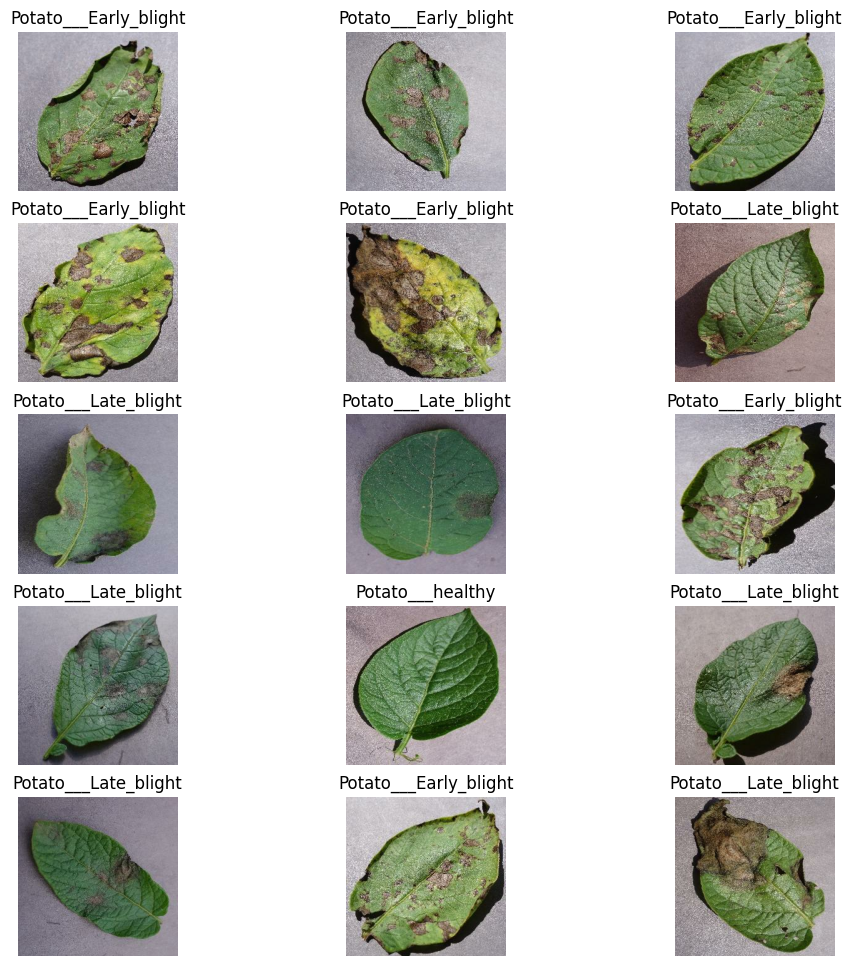

In [28]:
for image_batch,label_batch in dataset.take(1):
  print(label_batch)
  plt.figure(figsize=(12,12))
  for i in range(15):
    ax=plt.subplot(5,3,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [29]:
len(dataset)*32

2176

In [30]:
train_size=0.8
len(dataset)

68

In [31]:
def get_dataset_partitions_tf(dataset,train_split=0.8,test_split=0.1,validation_split=0.1,shuffle=True,shuffle_size=10000):

  if shuffle:
    dataset=dataset.shuffle(shuffle_size,seed=12)

  train_take=int(len(dataset)*train_split)
  test_take=int(len(dataset)*test_split)
  validation_take=int(len(dataset)*validation_split)

  train_dataset=dataset.take(train_take)
  test_dataset=dataset.skip(train_take)


  validtion_dataset=test_dataset.take(validation_take)
  test_dataset=test_dataset.skip(validation_take)
  return train_dataset,test_dataset,validtion_dataset

In [32]:
train_dataset,test_dataset,validation_dataset=get_dataset_partitions_tf(dataset)

In [33]:
len(train_dataset),len(test_dataset),len(validation_dataset)

(54, 8, 6)

In [34]:
train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [35]:
# !pip install --upgrade tensorflow


In [36]:
print(tf.__version__)

2.17.0


In [37]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [38]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip(mode='HORIZONTAL_AND_VERTICAL', seed=None),
    tf.keras.layers.RandomRotation(0.2)
])
input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)

In [39]:
# input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
# model=models.Sequential([
#     rescale,
#     data_augmentation,
#     layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Conv2D(128,(3,3),activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Flatten(),
#     layers.Dense(64,activation='relu'),
#     layers.Dense(n_classes,activation='softmax')
# ])
# model.build(input_shape=input_shape)

In [40]:
from tensorflow.keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Model

In [41]:
i=Input(shape=input_shape)
x = resize_and_rescale(i)
x = data_augmentation(x)

x=Conv2D(32,(3,3),strides=2,activation="relu")(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(64,(3,3),strides=2,activation="relu")(x)
x=MaxPooling2D((2,2))(x)
x=Conv2D(128,(3,3),strides=2,activation="relu")(x)
x=Flatten()(x)
x=Dense(64,activation="relu")(x)
x=Dense(n_classes,activation="softmax")(x)
model=Model(i,x)

In [42]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [43]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_3 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 127, 127, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 494,915 (1.89 MB)

 Trainable params: 494,915 (1.89 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history=model.fit(
    train_dataset,
    epochs=EPOCHES,
    batch_size=BATCH_SIZE,
    validation_data=validation_dataset
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 125ms/step - accuracy: 0.5465 - loss: 0.8879 - val_accuracy: 0.8125 - val_loss: 0.5052
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - accuracy: 0.8664 - loss: 0.3622 - val_accuracy: 0.8854 - val_loss: 0.2833
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 211ms/step - accuracy: 0.8971 - loss: 0.2665 - val_accuracy: 0.9167 - val_loss: 0.1982
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 131ms/step - accuracy: 0.9180 - loss: 0.2114 - val_accuracy: 0.9635 - val_loss: 0.1130
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 209ms/step - accuracy: 0.9333 - loss: 0.1738 - val_accuracy: 0.9375 - val_loss: 0.1010
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.9473 - loss: 0.1242 - val_accuracy: 0.9688 - val_loss: 0.0847
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.9633 - loss: 0.1108 - val_accuracy: 0.8802 - val_loss: 0.2687
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 17s 208ms/step - accuracy: 0.9075 - loss: 0.2231 - val_accu

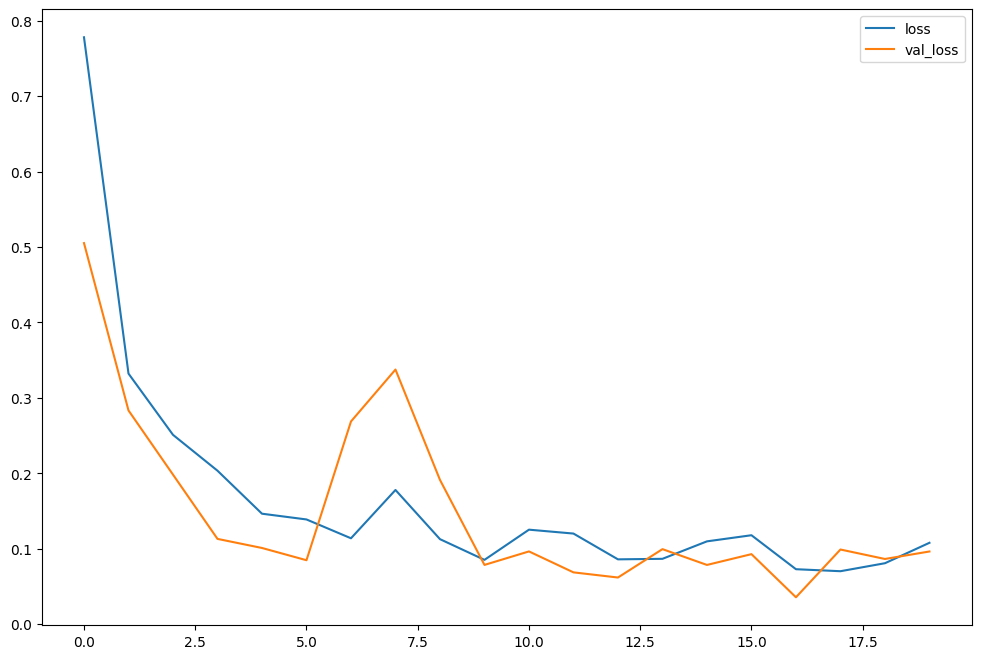

In [45]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()
plt.show()

In [50]:
# for img_batches,label_batches in test_dataset.take(1):
#   plt.figure(figsize=(15,15))
#   for i in range(9):
#     ax=plt.subplot(3,3,i+1)
#     plt.imshow(img_batches[i].numpy().astype('uint8'))
#     plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

First image"s actual label Potato___Late_blight
First image to predict
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Potato___Late_blight


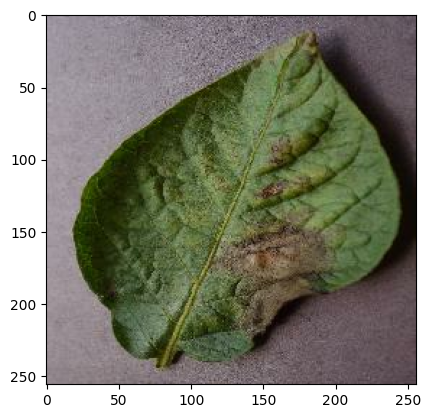

In [60]:
for images_batch,labels_batch in test_dataset.take(1):

  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0]
  print('First image"s actual label',class_names[first_label.numpy()])
  print('First image to predict')
  plt.imshow(first_image)

  prediction=model.predict(images_batch)
  print(class_names[np.argmax(prediction[0])])


In [70]:
def predict(model,img):
  img_array=tf.keras.preprocessing.image.img_to_array(img.numpy())
  img_array=tf.expand_dims(img_array,0)

  predictions=model.predict(img_array)

  predicted_class=class_names[np.argmax(predictions[0])]
  confidence=round(100*(np.max(predictions[0])),2)
  return predicted_class,confidence

In [72]:
for images,labels in test_dataset.take(1):
  plt.figure(figsize=(15,15))
  for i in range(9):
    plt.subplot(3,3,i+1)

    predicted_class,confidence=predict(model,images[i])
    actual_class=class_names[labels[i]]
    plt.title(f'Actual: {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}')
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.axis('off')

Output hidden; open in https://colab.research.google.com to view.

In [79]:
model.save("/content/drive/MyDrive/cnn_model.h5")

TypeError: cannot pickle 'module' object